In [1]:
#Hướng dẫn chi tiết về SVM trong Scikit-Learn
#LinearSVM để phát hiện loài hoa Iris-Virginica dựa trên độ dài và độ rộng của cánh hoa.

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC  # Import SVC instead of LinearSVC
from sklearn.linear_model import SGDClassifier  # Import SGDClassifier

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

m = len(y)
C = 1
alpha = 1 / (m * C)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
    #("svc", SVC(kernel="linear", C=1)),  # Use SVC with a linear kernel
    #("sgd_classifier", SGDClassifier(loss="hinge", alpha=1/(m*C))),  # Use SGDClassifier with hinge loss
])
svm_clf.fit(X, y)

svm_clf.predict([[4.2,1.3],[5.9,2.1]])



array([0., 1.])

In [ ]:
#practice
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# # Convert the dataset to a pandas DataFrame
# df = pd.DataFrame(iris.data, columns=iris.feature_names)

# # Add the target column to the DataFrame
# df['target'] = iris.target

# Convert the dataset to a pandas DataFrame and add the target column
df = pd.DataFrame(iris.data, columns=iris.feature_names).assign(target=iris.target)

# Save the DataFrame as a CSV file
df.to_csv('iris_dataset.csv', index=False)

# Display the CSV content
print(df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
#Nonlinear SVM Classification

#Thư viện PolynomialFeatures trong Scikit-Learn:Tự động tạo ra các đặc trưng mới từ đặc trưng ban đầu.

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Dùng SVM để phân loại dữ liệu trong không gian đặc trưng cao hơn:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, loss="hinge")
svm_clf.fit(X_poly, y)



e:\Machine learning\Linear Regression\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


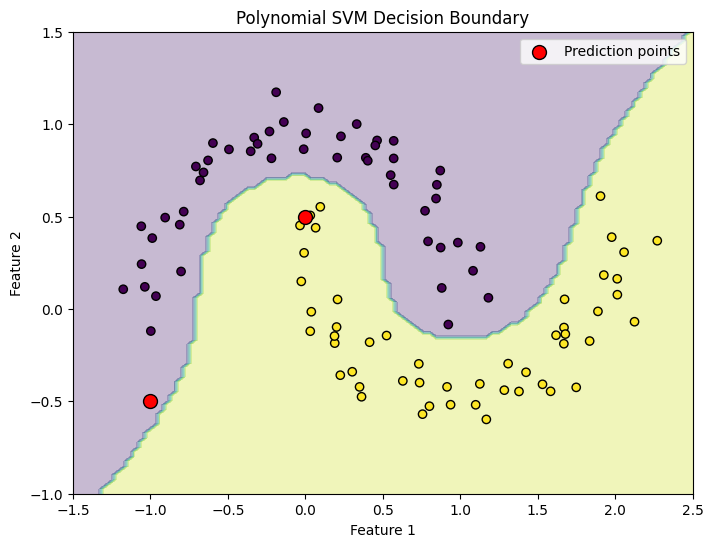

In [17]:
#practice
#Creating Nonlinear Data
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate a nonlinear dataset (e.g., moons)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Visualize the dataset
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
# plt.title("Nonlinear Dataset (Moons)")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()


from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Apply PolynomialFeatures and train an SVM
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),                    # Chuẩn hóa dữ liệu
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000))
])

poly_svm_clf.fit(X, y)


# Visualize the decision boundary
def plot_decision_boundary(clf, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap="viridis")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(poly_svm_clf, X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.scatter([0.0, -1.0], [0.5, -0.5], c='red', label="Prediction points", edgecolor="k", s=100)
plt.title("Polynomial SVM Decision Boundary")
plt.legend()
plt.show()



In [ ]:
#Hạt nhân đa thức (Polynomial Kernel) trong SVM(Nonlinear)
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Tạo Pipeline
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),                    # Chuẩn hóa dữ liệu
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))  # SVM với hạt nhân đa thức
])

# Huấn luyện mô hình
poly_kernel_svm_clf.fit(X, y)


In [1]:
#practice
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Tạo dataset phi tuyến tính
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

# Định nghĩa pipeline SVM với hạt nhân đa thức
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Chuẩn hóa dữ liệu
    ("svm_clf", SVC(kernel="poly"))  # SVM với hạt nhân đa thức
])

# Thiết lập tham số grid
param_grid = {
    "svm_clf__C": [0.1, 1, 10, 100],       # Các giá trị thử nghiệm cho C
    "svm_clf__degree": [2, 3, 4],          # Các giá trị thử nghiệm cho degree
    "svm_clf__coef0": [0.0, 0.5, 1, 2]     # Các giá trị thử nghiệm cho coef0
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Huấn luyện mô hình với Grid Search
grid_search.fit(X, y)

# Kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Dự đoán với mô hình tối ưu
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Đánh giá hiệu suất
print("Accuracy on training data:", accuracy_score(y, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'svm_clf__C': 10, 'svm_clf__coef0': 0.5, 'svm_clf__degree': 4}
Best score: 0.9949999999999999
Accuracy on training data: 0.995


In [2]:
# Adding Similarity Features(Nonlinear)
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Tạo tập dữ liệu phi tuyến tính
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xác định hàm thêm đặc trưng tương đồng (Similarity Features)
def add_similarity_features(X, landmarks, gamma):
    """
    Thêm đặc trưng tương đồng cho X, dựa trên các mốc (landmarks) và tham số gamma.
    
    Args:
    - X: Dữ liệu gốc (numpy array)
    - landmarks: Các điểm mốc (numpy array)
    - gamma: Tham số điều chỉnh mức độ ảnh hưởng của khoảng cách
    
    Returns:
    - Dữ liệu mới với đặc trưng tương đồng (numpy array)
    """
    new_features = np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - landmarks, axis=2) ** 2)
    return new_features

# Chọn các điểm mốc (landmarks) ngẫu nhiên từ tập huấn luyện
n_landmarks = 10
np.random.seed(42)
random_indices = np.random.choice(len(X_train), n_landmarks, replace=False)
landmarks = X_train[random_indices]

# Thêm đặc trưng tương đồng vào tập dữ liệu
gamma = 0.1  # Tham số gamma
X_train_transformed = add_similarity_features(X_train, landmarks, gamma)
X_test_transformed = add_similarity_features(X_test, landmarks, gamma)

# Sử dụng SVM để huấn luyện trên dữ liệu mới
svm_clf = Pipeline([
    ("scaler", StandardScaler()),  # Chuẩn hóa dữ liệu
    ("svm", SVC(kernel="linear", C=1))  # SVM với hạt nhân tuyến tính
])

# Huấn luyện mô hình
svm_clf.fit(X_train_transformed, y_train)

# Đánh giá mô hình
accuracy = svm_clf.score(X_test_transformed, y_test)
print("Accuracy with similarity features:", accuracy)


Accuracy with similarity features: 0.85


In [ ]:
#SVM Regression (Hồi quy SVM)

#Hồi quy tuyến tính SVM
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)  # Đường phố rộng với epsilon=1.5
svm_reg.fit(X, y)


#Hồi quy phi tuyến SVM
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

